In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE, SelectKBest
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from itertools import compress
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

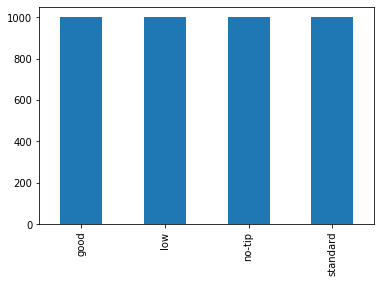

In [62]:
sample_size = 1000
file_path = '/Users/mattrusso/Desktop/trip_data 3.csv'

df = pd.read_csv(file_path)
df = df.groupby('tip').apply(lambda x: x.sample(sample_size))
df = df.sample(frac=1) #shuffle the dataframe rows

#visualize the sample data, which contain 1000 observations from each class
df.tip.value_counts().sort_index().plot.bar()

In [63]:
df

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
tip                                                                    
standard 14749        2.0  2019-12-03 18:14:21   2019-12-03 18:28:53   
no-tip   34272        1.0  2019-12-06 18:59:05   2019-12-06 19:09:34   
standard 100463       2.0  2019-12-17 12:10:12   2019-12-17 12:28:19   
good     36192        2.0  2019-12-06 23:26:55   2019-12-06 23:42:28   
         80862        2.0  2019-12-14 02:50:40   2019-12-14 02:57:50   
...                   ...                  ...                   ...   
standard 103047       2.0  2019-12-17 18:55:56   2019-12-17 19:00:42   
good     44401        2.0  2019-12-08 07:40:38   2019-12-08 07:47:21   
standard 98477        2.0  2019-12-17 00:49:40   2019-12-17 00:51:28   
         72163        2.0  2019-12-12 20:58:27   2019-12-12 21:05:21   
low      29757        1.0  2019-12-06 01:28:38   2019-12-06 02:00:18   

                 RatecodeID  PULocationID  DOLocationID  passenger_count  \
tip                                                                        
standard 14749          1.0           260           157              1.0   
no-tip   34272          1.0            97            25              1.0   
standard 100463         1.0            33            97              1.0   
good     36192          1.0            97            17              1.0   
         80862          1.0           145           112              1.0   
...                     ...           ...           ...              ...   
standard 103047         1.0           223             7              1.0   
good     44401          1.0           166           151              1.0   
standard 98477          1.0           223           223              1.0   
         72163          1.0            41            42              1.0   
low      29757          1.0           255           151              2.0   

                 trip_distance  fare_amount  extra  mta_tax  tolls_amount  \
tip                                                                         
standard 14749            1.84         10.5   1.00      0.5           0.0   
no-tip   34272            0.30          7.5   1.00      0.5           0.0   
standard 100463           1.42         12.0   0.00      0.5           0.0   
good     36192            2.55         11.5   0.50      0.5           0.0   
         80862            1.97          8.0   0.50      0.5           0.0   
...                        ...          ...    ...      ...           ...   
standard 103047           0.64          5.0   1.00      0.5           0.0   
good     44401            1.57          7.5   0.00      0.5           0.0   
standard 98477            0.43          3.5   0.50      0.5           0.0   
         72163            1.20          7.0   0.50      0.5           0.0   
low      29757            8.10         29.0   3.25      0.5           0.0   

                 improvement_surcharge  total_amount  trip_type  \
tip                                                               
standard 14749                     0.3         14.76        1.0   
no-tip   34272                     0.3          9.30        1.0   
standard 100463                    0.3         15.36        1.0   
good     36192                     0.3         16.00        1.0   
         80862                     0.3         12.30        1.0   
...                                ...           ...        ...   
standard 103047                    0.3          8.16        1.0   
good     44401                     0.3         10.79        1.0   
standard 98477                     0.3          5.80        1.0   
         72163                     0.3          9.30        1.0   
low      29757                     0.3         38.05        1.0   

                 congestion_surcharge       tip  
tip                                              
standard 14749                   0.00  standard  
no-tip   34272                   0.00    no-tip  
standard 100463  

In [64]:
df['lpep_pickup_datetime'] = pd.to_datetime(df.lpep_pickup_datetime)

In [65]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df.lpep_dropoff_datetime)

In [66]:
time = df.loc[df.lpep_pickup_datetime >= ts, :]

In [67]:
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds()

In [68]:
# 702 seconds

In [69]:
df['trip_duration'] = 702

#Remove the `lpep_pickup_datetime` and `lpep_dropoff_datetime` from the dataframe.
del df['lpep_dropoff_datetime']
del df['lpep_pickup_datetime']

In [70]:
df

VendorID  RatecodeID  PULocationID  DOLocationID  \
tip                                                                 
standard 14749        2.0         1.0           260           157   
no-tip   34272        1.0         1.0            97            25   
standard 100463       2.0         1.0            33            97   
good     36192        2.0         1.0            97            17   
         80862        2.0         1.0           145           112   
...                   ...         ...           ...           ...   
standard 103047       2.0         1.0           223             7   
good     44401        2.0         1.0           166           151   
standard 98477        2.0         1.0           223           223   
         72163        2.0         1.0            41            42   
low      29757        1.0         1.0           255           151   

                 passenger_count  trip_distance  fare_amount  extra  mta_tax  \
tip                                                                            
standard 14749               1.0           1.84         10.5   1.00      0.5   
no-tip   34272               1.0           0.30          7.5   1.00      0.5   
standard 100463              1.0           1.42         12.0   0.00      0.5   
good     36192               1.0           2.55         11.5   0.50      0.5   
         80862               1.0           1.97          8.0   0.50      0.5   
...                          ...            ...          ...    ...      ...   
standard 103047              1.0           0.64          5.0   1.00      0.5   
good     44401               1.0           1.57          7.5   0.00      0.5   
standard 98477               1.0           0.43          3.5   0.50      0.5   
         72163               1.0           1.20          7.0   0.50      0.5   
low      29757               2.0           8.10         29.0   3.25      0.5   

                 tolls_amount  improvement_surcharge  total_amount  trip_type  \
tip                                                                             
standard 14749            0.0                    0.3         14.76        1.0   
no-tip   34272            0.0                    0.3          9.30        1.0   
standard 100463           0.0                    0.3         15.36        1.0   
good     36192            0.0                    0.3         16.00        1.0   
         80862            0.0                    0.3         12.30        1.0   
...                       ...                    ...           ...        ...   
standard 103047           0.0                    0.3          8.16        1.0   
good     44401            0.0                    0.3         10.79        1.0   
standard 98477            0.0                    0.3          5.80        1.0   
         72163            0.0                    0.3          9.30        1.0   
low      29757            0.0                    0.3         38.05        1.0   

                 congestion_surcharge       tip  trip_duration  
tip                                                             
standard 14749                   0.00  standard            702  
no-tip   34272                   0.00    no-tip            702  
standard 100463                  0.00  standard            702  
good     36192                   0.00      good            702  
         80862                   0.00      good            702  
...                               ...       ...            ...  
standard 103047                  0.00  standard            702  
good     44401                   0.00      good            702  
standard 98477                   0.00  standard            702  
         72163                   0.00  standard            702  
low      29757                   2.75       low            702  

[4000 rows x 16 columns]

In [71]:
#Encode the class labels

#TODO: Initialize the `LabelEncoder`

#TODO: Fit the `LabelEncoder` to the class labels in the 'tip' field

#TODO: Use the `LabelEncoder` to encode class labels in the 'tip' field.

#TODO: Display the encoded labels

In [88]:
le = preprocessing.LabelEncoder()
le.fit(df['tip'])
df['tip'] = le.transform(df['tip'])

In [89]:
le

LabelEncoder()

In [90]:
X = df.loc[:,['VendorID','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount','trip_type','congestion_surcharge','trip_duration']]

In [91]:
X.shape

(4000, 15)

In [92]:
y = df.tip

In [93]:
y.shape

(4000,)

In [96]:
scaler = MinMaxScaler(feature_range=(0.1,0.9) 
                     )

X = scaler.fit_transform(X)

In [97]:
k_best   = SelectKBest(score_func= f_classif, #TODO choose either chi2 or f_classif
                     k= 7#TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)

In [98]:
support = k_best.get_support()

In [99]:
support

array([ True, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True, False])

In [101]:
features = ['VendorID','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount','trip_type','congestion_surcharge','trip_duration']

In [102]:
print(list(compress(features, support))) 

['VendorID', 'DOLocationID', 'trip_distance', 'fare_amount', 'extra', 'total_amount', 'congestion_surcharge']


In [103]:
# PULocationID, DOLocationID, trip_distance, fare_amount, extra, total_amount, congestion_surcharge 

In [104]:
svm_estimator = svm.SVC(kernel='linear') 

In [105]:
svm_estimator = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe = RFE(estimator= svm_estimator, #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select= 7 #TODO: enter the number of required features
         )

rfe.fit(X, y) #Note: this may take a few minutes to complete

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                  coef0=0.0, decision_function_shape='ovr', degree=3,
                  gamma='scale', kernel='linear', max_iter=-1,
                  probability=False, random_state=None, shrinking=True,
                  tol=0.001, verbose=False),
    n_features_to_select=7, step=1, verbose=1)

In [110]:
support2 = rfe.get_support()

In [111]:
print(list(compress(features, support2))) 



['passenger_count', 'trip_distance', 'fare_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']


In [258]:
#Standardize the input features
scaler = MinMaxScaler(feature_range=(0.1,0.9) #TODO: provide the min and max values for the features
                     )

X = scaler.fit_transform(X)

In [259]:

#Univariate feature selection using SelectKBest.

k_best   = SelectKBest(score_func= chi2 , #TODO choose either chi2 or f_classif
                     k= 7 #TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)

In [113]:
testsupport = k_best.get_support()

In [114]:
print(list(compress(features, testsupport))) 



['VendorID', 'DOLocationID', 'trip_distance', 'fare_amount', 'extra', 'total_amount', 'congestion_surcharge']
